## Домашнее задание 4

## Задача 2 <br>
Пусть m - число гипотез. $M_0$ - индексы верных гипотез и $|M_0| = m_0$ <br>
Рассмотрим отсортированные pvalue: $p_{(1)}, p_{(2)}, ..., p_{(m)}$ и соответствующие им гипотезы $H_{(1)}, H_{(2)}, ..., H_{(m)}$ <br>
Теперь пусть k - номер первой отвергнутой верной гипотезы в порядке следования pvalue $p_{(1)}, p_{(2)}, ..., p_{(m)}$. <br>
Так как $H_{(k)}$ была отвергнута, то $p_{(k)} \leq \frac{\alpha}{m-h+1}$ <br>
При этом так как $H_{(k)}$ отвергнута, то и все $H_{(1)}, H_{(2)}, ..., H_{(k-1)}$ тоже отвергнуты (т.к. если бы какая-то из этих была бы принята, то были бы приняты и все последующие). <br>
Т.е. $H_{(1)}, H_{(2)}, ..., H_{(k-1)}$ отвергнуты, причем среди нет верных гипотез так как мы именно так выбрали k. Тогда среди $H_{(k)}, H_{(k+1)}, ..., H_{(m)}$ точно есть $m_0$ верных гипотез. Тогда получим, что $m - k + 1 \geq m_0$. $\Rightarrow \frac{1}{m - k + 1} \leq \frac{1}{m_0}$ <br>
В итоге получим : $p_{(k)} \leq \frac{\alpha}{m-k+1} \leq \frac{\alpha}{m_0}$. То есть если мы отвергаем верную гипотезу, то ее pvalue $\leq \frac{\alpha}{m_0}$. <br>
Теперь рассмотрим A = {$p_i \leq \frac{\alpha}{m_0}$}. $\Rightarrow FWER = P(V>0) = P(A)$ = P({$p_i \leq \frac{\alpha}{m_0}$}) $\leq m_0 * \frac{\alpha}{m_0} = \alpha$ <br>
Таким образом, доказали то, что нужно.

## Задание 3

In [26]:
import numpy as np
import pandas as pd
import sklearn
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
names = ['label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
         'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline'] 
data = pd.read_csv('wine.data', names=names)
data.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
X = np.array(data.Alcohol)


178

Сначала отмасштабируем, чтобы проверять на принадлежность к стандартному нормальному.

In [16]:
X_new = (X - np.mean(X)) / np.std(X)

**Критерий Колмогорова (Лил-лиефорса)**

In [30]:
kstest = sps.kstest(X_new, cdf=sps.norm.cdf)
kstest

KstestResult(statistic=0.06854144954910629, pvalue=0.35890272266893386)

**Критерий Шапиро-Уилка**

In [31]:
shapiro = sps.shapiro(X_new)
shapiro

(0.9818047285079956, 0.02005171775817871)

**Критерий Жарка-Бера**

In [32]:
jarque_bera = sps.jarque_bera(X_new)
jarque_bera 

(5.591542594069666, 0.06106775478515103)

**Критерий на основе выборочного коэффициента асимметрии**

In [33]:
skewtest = sps.skewtest(X_new)
skewtest

SkewtestResult(statistic=-0.2885622428923775, pvalue=0.7729163926473778)

**normaltest**

In [46]:
normaltest = sps.normaltest(X_new)
normaltest

NormaltestResult(statistic=15.963552699056656, pvalue=0.00034163202531286235)

Применим множественную проверку гипотез. Будем использовать метод Холма, так как мы не знаем ничего о характере зависимости между статистиками и поэтому метод Холма является самой мощной процедурой, контролирующей FWER на уровне $\alpha$

In [47]:
multipletests([kstest[1], shapiro[1], jarque_bera[1], skewtest[1], normaltest[1]], alpha=0.05, method='holm')

(array([False, False, False, False,  True]),
 array([0.71780545, 0.08020687, 0.18320326, 0.77291639, 0.00170816]),
 0.010206218313011495,
 0.01)

Как видим, даже после множественной проверки гипотез, придется отвергнуть гипотезу о нормальности распределения.

если имеется ввиду, что мы должны написать множественную проверку гипотез сами, то вот

In [41]:
def holm(pvalues, alpha):
    m = pvalues.shape[0]
    stop = m
    for i, pval in enumerate(sorted(pvalues)):
        if pval >= alpha/(m - i):
            stop = i
            break
    return np.argsort(pvalues)>=stop

## Задача 4

In [48]:
X = np.load('hw4t4.npy')
print(X.shape)

(1000,)


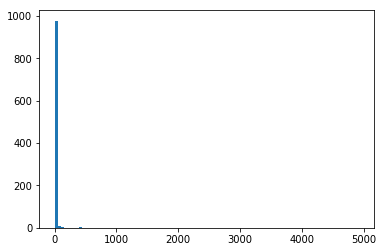

In [129]:
plt.hist(X, bins=100)
plt.show()

Как видим из данного графика, наши данные содержат выбросы. Чтобы понять, экспоненциальное распределение ли имеют данные, сначала уберем выбросы используя границы Тьюки.

In [134]:
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
k = 1.5
left = Q1 - k*(Q3 - Q1)
right = Q3 + k*(Q3 - Q1)
print('Полученный интервал: ({}, {})'.format(left, right))

Полученный интервал: (-6.874358709913871, 14.615005673354563)


Оставим только те значения, которые попадают в этот интервал

In [144]:
X_clear = X[X > left]
X_clear = X_clear[X_clear < right]
print(X_clear.shape)

(937,)


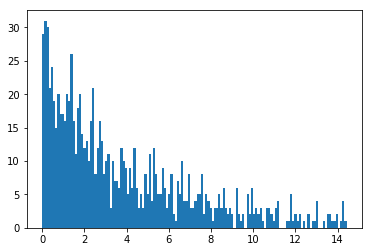

In [154]:
plt.hist(X_clear, bins=140)
plt.show()

Так как в этой задаче мы рассматриваем экспонециальное распределение с одиним параметром, то положим loc = 0.

In [158]:
loc, scale = sps.expon.fit(X_clear)
print(loc, scale)
loc = 0

0.0022997618405856063 3.7418565320229242


In [159]:
kstest = sps.kstest(X_clear, 'expon', args=[loc, scale])
kstest

KstestResult(statistic=0.038642257726331786, pvalue=0.11869593684547097)

Получили хороший pvalue, поэтому можем принять гипотезу о том, что данные распределены экспоненциально, на уровне значимости $\alpha =0.05$

Найдем оценку среднего срока службы лампочки

In [163]:
print('Средний срок службы лампочки: ', np.mean(X_clear))

Средний срок службы лампочки:  3.744212438329417


## Задача 5

Считываем выборки

In [122]:
names = ['label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
         'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline'] 
data = pd.read_csv('wine.data', names=names)
X4 = data.Alcohol
X5 = data.Ash
X2 = data['Alcalinity of ash']
X6 = data['Nonflavanoid phenols']
X7 = data['Proanthocyanins']

In [123]:
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
data = pd.read_csv('vowel-context.csv', sep = ' ', names=names)
X3 = data['7']

In [124]:
data = pd.read_csv('slump_test.csv', encoding='latin1')
X1 = np.array(data['Compressive Strength (28-day)(Mpa)'])

Проверяем каждую выборку на нормальность 5 критериями

In [125]:
#нормализуем
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)
X3 = (X3 - np.mean(X3)) / np.std(X3)
X4 = (X4 - np.mean(X4)) / np.std(X4)
X5 = (X5 - np.mean(X5)) / np.std(X5)
X6 = (X6 - np.mean(X6)) / np.std(X6)
X7 = (X7 - np.mean(X7)) / np.std(X7)


pvalues_1 = []
pvalues_1.append(sps.kstest(X1, cdf=sps.norm.cdf)[1])
pvalues_1.append(sps.shapiro(X1)[1])
pvalues_1.append(sps.jarque_bera(X1)[1])
pvalues_1.append(sps.skewtest(X1)[1])
pvalues_1.append(sps.normaltest(X1)[1])

pvalues_2 = []
pvalues_2.append(sps.kstest(X2, cdf=sps.norm.cdf)[1])
pvalues_2.append(sps.shapiro(X2)[1])
pvalues_2.append(sps.jarque_bera(X2)[1])
pvalues_2.append(sps.skewtest(X2)[1])
pvalues_2.append(sps.normaltest(X2)[1])

pvalues_3 = []
pvalues_3.append(sps.kstest(X3, cdf=sps.norm.cdf)[1])
pvalues_3.append(sps.shapiro(X3)[1])
pvalues_3.append(sps.jarque_bera(X3)[1])
pvalues_3.append(sps.skewtest(X3)[1])
pvalues_3.append(sps.normaltest(X3)[1])

pvalues_4 = []
pvalues_4.append(sps.kstest(X4, cdf=sps.norm.cdf)[1])
pvalues_4.append(sps.shapiro(X4)[1])
pvalues_4.append(sps.jarque_bera(X4)[1])
pvalues_4.append(sps.skewtest(X4)[1])
pvalues_4.append(sps.normaltest(X4)[1])

pvalues_5 = []
pvalues_5.append(sps.kstest(X5, cdf=sps.norm.cdf)[1])
pvalues_5.append(sps.shapiro(X5)[1])
pvalues_5.append(sps.jarque_bera(X5)[1])
pvalues_5.append(sps.skewtest(X5)[1])
pvalues_5.append(sps.normaltest(X5)[1])

pvalues_6 = []
pvalues_6.append(sps.kstest(X6, cdf=sps.norm.cdf)[1])
pvalues_6.append(sps.shapiro(X6)[1])
pvalues_6.append(sps.jarque_bera(X6)[1])
pvalues_6.append(sps.skewtest(X6)[1])
pvalues_6.append(sps.normaltest(X6)[1])

pvalues_7 = []
pvalues_7.append(sps.kstest(X7, cdf=sps.norm.cdf)[1])
pvalues_7.append(sps.shapiro(X7)[1])
pvalues_7.append(sps.jarque_bera(X7)[1])
pvalues_7.append(sps.skewtest(X7)[1])
pvalues_7.append(sps.normaltest(X7)[1])       

Теперь применим множественную проверку гипотез. Заметим, что мы ничего не знаем о независимости полученных статистик (так как статистики, посчитанные по одной и той же выборке вполне могут быть зависимы), а поэтому мы не можем применять метод Бенжамини-Хохберга, так как он контролируем FDR на уровне $\alpha$ только в случае независимых статистик или при выполнении свойства PDRS. Поэтому применим метод Бенжамини-Иекутели, на использование которого таких ограничений не накладывается. <br> <br>
Здесь, как получили в прошлом задании, будем считать, что если гипотеза отвергается одним из критериев, то мы ее отвергаем.
<br><br>
(Хотя на самом деле в случае FDR это работает не совсем так. В случае FDR подойдет следующая схема: отвергнуть гипотезу, если доля критериев, которые отвергают эту гипотезу, $\geq \alpha$.<br>
Как мне показалось, от нас хотят именно первый вариант, поэтому будем рассмаривать его) 

In [126]:
all_pvalues = pvalues_1 + pvalues_2 + pvalues_3 +  pvalues_4 + pvalues_5 + pvalues_6 + pvalues_7

reject, pvals_corrected, _, _ = multipletests(all_pvalues, alpha=0.05, method='fdr_by')
print('Выборка 1:')
print(reject[:5])
print(pvals_corrected[:5])
print('\nВыборка 2:')
print(reject[5:10])
print(pvals_corrected[5:10])
print('\nВыборка 3:')
print(reject[10:15])
print(pvals_corrected[10:15])
print('\nВыборка 4:')
print(reject[15:20])
print(pvals_corrected[15:20])
print('\nВыборка 5:')
print(reject[20:25])
print(pvals_corrected[20:25])
print('\nВыборка 6:')
print(reject[25:30])
print(pvals_corrected[25:30])
print('\nВыборка 7:')
print(reject[30:35])
print(pvals_corrected[30:35])

Выборка 1:
[False False False False False]
[1. 1. 1. 1. 1.]

Выборка 2:
[False False False False False]
[1. 1. 1. 1. 1.]

Выборка 3:
[False False False False False]
[1.         0.64279453 1.         1.         1.        ]

Выборка 4:
[False False False False  True]
[1.         0.2425211  0.59088081 1.         0.02479178]

Выборка 5:
[False False False False False]
[1.         0.40106346 0.17594621 1.         0.40106346]

Выборка 6:
[False  True False False False]
[0.21540433 0.01531588 0.19436775 0.21540433 0.12891596]

Выборка 7:
[False False False False False]
[1.         0.21540433 0.17594621 0.17594621 0.17594621]


Таким образом гипотеза о нормальности для выборок 1,2,3,5,7 принимаюся на уровне значимости $\alpha = $0.05, а для выборок 4, 6 отвергаются. <br>
Также заметим, что при рассмотрении второго варианта (отвергнуть гипотезу, если доля критериев, которые отвергают эту гипотезу, $\geq \alpha$) мы получим такой же вариант.